In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [3]:
import pandas as pd

# Charger le dataset
df = pd.read_csv("loan_approval_dataset.csv")

# Afficher les 5 premières lignes
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
# Vérifier les valeurs manquantes dans le dataset
missing_values = df.isnull().sum()

# Afficher le nombre de valeurs manquantes par colonne
print(missing_values)


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [7]:
# Afficher uniquement les colonnes avec des valeurs manquantes
missing_values = missing_values[missing_values > 0]
print(missing_values)


Series([], dtype: int64)


In [9]:
# Afficher les types de données de chaque colonne
print(df.dtypes)


loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [11]:
# Afficher un résumé statistique des colonnes numériques
print(df.describe())


           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.20000

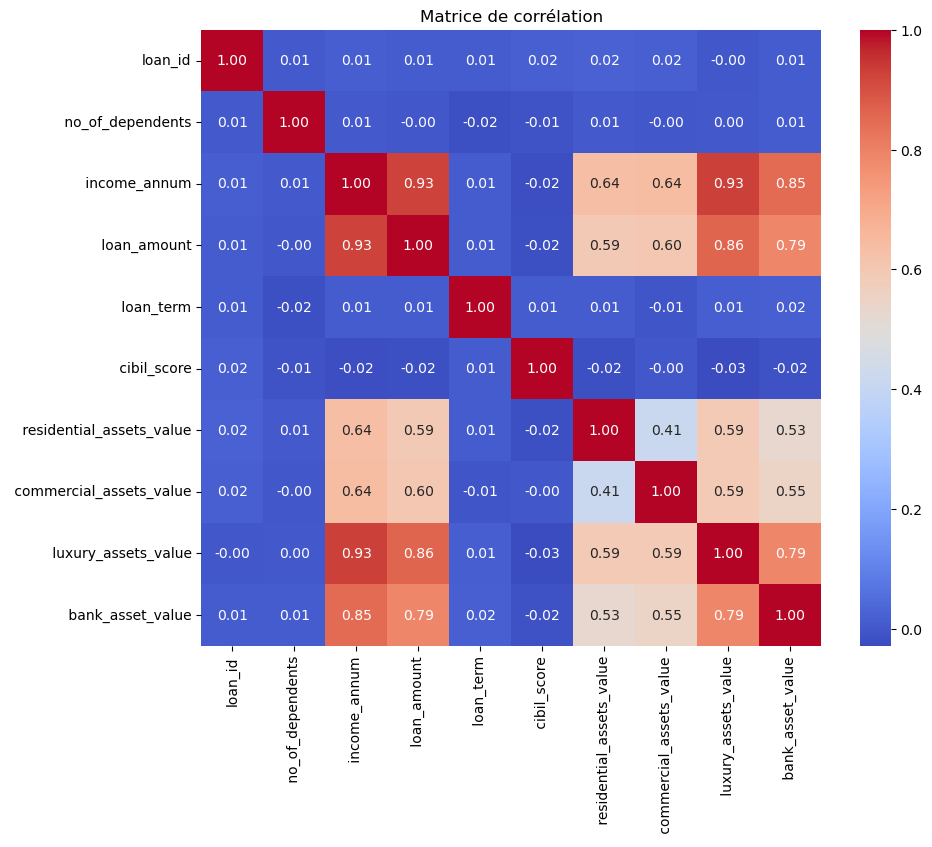

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

# Sélectionner uniquement les colonnes numériques avant de calculer la corrélation
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Vérifier si la matrice est vide
if correlation_matrix.empty:
    print("Aucune corrélation trouvée, vérifie les colonnes numériques de ton dataset.")
else:
    # Afficher la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matrice de corrélation")
    plt.show()




Noms des colonnes dans le DataFrame : Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


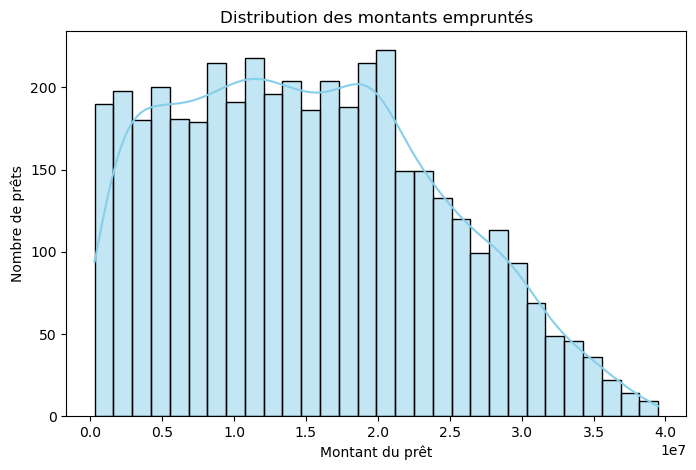

In [29]:
#Histogramme des montants empruntés
print("Noms des colonnes dans le DataFrame :", df.columns)  # Vérifie les colonnes
df.columns = df.columns.str.strip()  # Supprime les espaces éventuels

# Vérifie si 'loan_amount' est bien présent
if 'loan_amount' not in df.columns:
    print("Erreur : La colonne 'loan_amount' n'existe pas. Vérifie les noms des colonnes.")
else:
    # Tracer l'histogramme
    plt.figure(figsize=(8, 5))
    sns.histplot(df['loan_amount'], bins=30, kde=True, color='skyblue')
    plt.title('Distribution des montants empruntés')
    plt.xlabel('Montant du prêt')
    plt.ylabel('Nombre de prêts')
    plt.show()



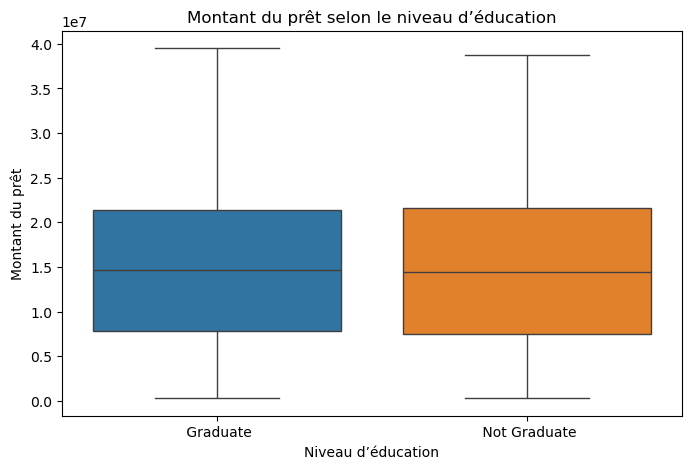

In [33]:
df.columns = df.columns.str.strip()  # Supprime les espaces cachés dans les noms de colonnes
plt.figure(figsize=(8, 5))
sns.boxplot(x='education', y='loan_amount', data=df, hue='education', legend=False)
plt.title('Montant du prêt selon le niveau d’éducation')
plt.xlabel('Niveau d’éducation')
plt.ylabel('Montant du prêt')
plt.show()

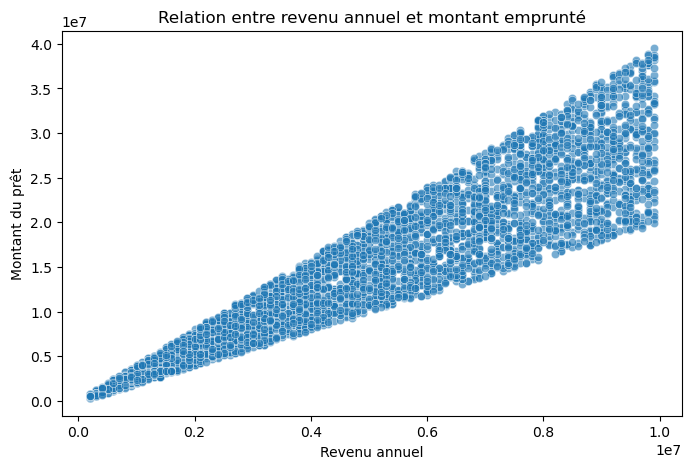

In [35]:
df.columns = df.columns.str.strip()  # Supprime les espaces cachés dans les noms de colonnes
plt.figure(figsize=(8, 5))
sns.scatterplot(x='income_annum', y='loan_amount', data=df, alpha=0.6)
plt.title('Relation entre revenu annuel et montant emprunté')
plt.xlabel('Revenu annuel')
plt.ylabel('Montant du prêt')
plt.show()


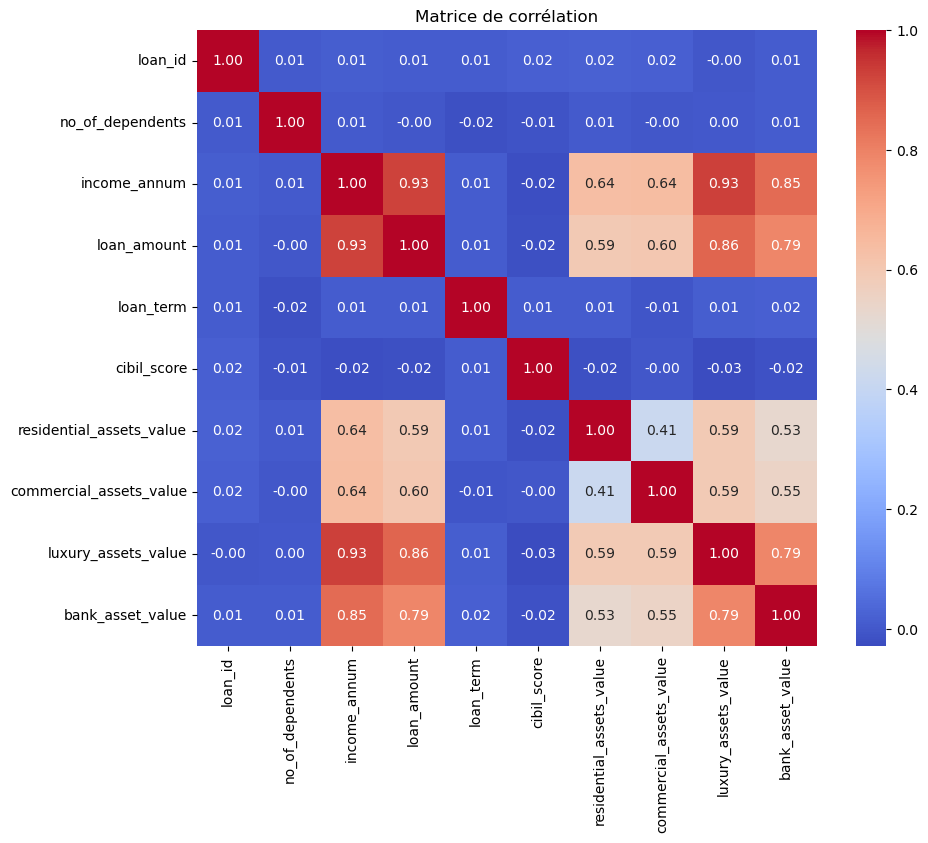

In [37]:
df.columns = df.columns.str.strip()  # Supprime les espaces cachés dans les noms de colonnes
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()
